# Projeto do módulo

## Crie seu dataquality 

Utilizando de POO, crie um **módulo** que importado para um jupyter notebook crie um relatório como no pandas-profiling/YData-profiling/SweetViz.

Neste módulo, tera um método geral para análise de qualquer dataset:
- Contagem de nulos
- Contagem de valores únicos 
- .value_counts em colunas categóricas
- .describe nas colunas numéricas 
- gráficos de distribuição de colunas categóricas 
- gráficos de distribuição de colunas numéricas 
- ... 

E, usando do módulo desenvolvido, faça uma análise de um dataset escolhido no Kaggle.

- Grupos de até 3 pessoas;
- Repositório no github;
- Histórico no github;
- Entrega no 30/09 -> link do github


In [1]:
from meu_dataquality import MeuDataQuality

In [ ]:
MeuDataQuality("csv_genérico.csv")

# Aula 4 - Mais Pandas

Nessa aula, iremos tratar dos seguintes conteúdos:
- Pandas
- Series
- Métodos Pandas
- DataFrames
- Combinando DataFrames
- Trabalhando com CSVs
- GroupBy e Agregadores

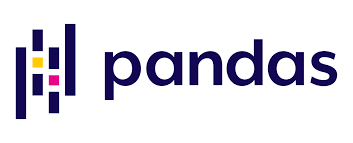

##   

## Pandas

__Pandas__ é um pacote python construído com base no __NumPy__ e __Matplotlib__ que busca organizar dados no formato de tabela, atribuindo rótulos às linhas e colunas. O pacote __Pandas__ fornece ainda um conjunto de funcionalidades que permite processar as informações de tabelas de forma bastante eficiente, implementando métodos fundamentais para fins de tratamento de dados.

O Pandas organiza os dados nos seguintes tipos de estruturas:
- Series (Séries)
- DataFrame

In [5]:
import pandas as pd 

In [6]:
# Cria um dicionario com nomes de alunos e suas respectivas notas
dictionary = {'Alunos': ['Sandro', 'Rafael', 'Tiago', 'André', 'Camila', 'Teo', 'Carlos', 'Juca', 'Carla'],
              'Notas': [8, 10, 9.5, 7.5, 9.5, 10, 5, 6.5, 10]}

# Cria um DataFrame a partir de um dicionario
df = pd.DataFrame(dictionary)

# Mostra o resultado do DataFrame
df

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


In [7]:
# topo do dataset
df.head()

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5


In [8]:
# só a parte de baixo 
df.tail()

,Alunos,Notas
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


In [9]:
df.shape

(9, 2)

In [10]:
df.columns.tolist()

['Alunos', 'Notas']

In [11]:
df["Alunos"]

0    Sandro
1    Rafael
2     Tiago
3     André
4    Camila
5       Teo
6    Carlos
7      Juca
8     Carla
Name: Alunos, dtype: object

In [12]:
df["Notas"]

0     8.0
1    10.0
2     9.5
3     7.5
4     9.5
5    10.0
6     5.0
7     6.5
8    10.0
Name: Notas, dtype: float64

In [13]:
# for coluna in df.columns:
#     print(df[coluna])
#     print("\n")

In [14]:
# filtrar e ver apenas a nota da Camila
df[  df["Alunos"] == "Camila"   ]

,Alunos,Notas
4,Camila,9.5


In [15]:
# alunos com nota entre 5 e 8 
df[  (df["Notas"] > 5)   &   (df["Notas"] < 8)     ] 

,Alunos,Notas
3,André,7.5
7,Juca,6.5


In [16]:
condi_1 = df["Notas"] > 5 
condi_2 = df["Notas"] < 8

df[  condi_1 & condi_2  ]

,Alunos,Notas
3,André,7.5
7,Juca,6.5


In [17]:
df[  df["Notas"] == df["Notas"].max()   ]

,Alunos,Notas
1,Rafael,10.0
5,Teo,10.0
8,Carla,10.0


In [18]:
df[ df["Notas"] == df["Notas"].max()  ]

,Alunos,Notas
1,Rafael,10.0
5,Teo,10.0
8,Carla,10.0


In [19]:
lista_notas = [8.0, 10.0, 5.0]

In [20]:
df[  df["Notas"].isin(lista_notas)     ]

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
5,Teo,10.0
6,Carlos,5.0
8,Carla,10.0


In [21]:
## apenas nomes que começam com A 
df[df["Alunos"].str.startswith("A")   ]

,Alunos,Notas
3,André,7.5


In [22]:
df[ df["Alunos"].str.lower().str.startswith("a")   ]

,Alunos,Notas
3,André,7.5


# Melhorando nosso dataframe

In [23]:
df

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


In [24]:
import numpy as np

n_linhas, n_colunas = df.shape

np.random.seed(42)
lista_faltas = np.random.randint(low = 0, high = 10, size = n_linhas)
lista_faltas

array([6, 3, 7, 4, 6, 9, 2, 6, 7])

In [25]:
# Quero acrescentar a coluna de faltas no meu dataframe 
df["Faltas"] = lista_faltas

In [26]:
# quero mostrar apenas duas colunas específicas
df[  ["Alunos","Faltas"]  ]


,Alunos,Faltas
0,Sandro,6
1,Rafael,3
2,Tiago,7
3,André,4
4,Camila,6
5,Teo,9
6,Carlos,2
7,Juca,6
8,Carla,7


In [27]:
# Quero filtrar faltas, mostrar alunos e notas 
df[ df["Faltas"] > 6  ][ ["Alunos","Notas"]  ]

,Alunos,Notas
2,Tiago,9.5
5,Teo,10.0
8,Carla,10.0


In [28]:
df_aux = df[df["Faltas"] > 6]
df_aux[ ["Alunos","Notas"]   ]  

,Alunos,Notas
2,Tiago,9.5
5,Teo,10.0
8,Carla,10.0


In [29]:
df["Notas"]

0     8.0
1    10.0
2     9.5
3     7.5
4     9.5
5    10.0
6     5.0
7     6.5
8    10.0
Name: Notas, dtype: float64

In [30]:
"Notas"

'Notas'

In [31]:
df[df["Notas"] > 8 ]

,Alunos,Notas,Faltas
1,Rafael,10.0,3
2,Tiago,9.5,7
4,Camila,9.5,6
5,Teo,10.0,9
8,Carla,10.0,7


In [32]:
df[df["Faltas"] % 2 == 0 ]

,Alunos,Notas,Faltas
0,Sandro,8.0,6
3,André,7.5,4
4,Camila,9.5,6
6,Carlos,5.0,2
7,Juca,6.5,6


In [33]:
# Classificar os alunos em "falta muito" ou "Falta pouco"
# Definir uma função que faz essa classficação
def classe_faltas(valor): 
    if valor >= 5:
        classificacao = "muito"
    else:
        classificacao = "pouco"

    return classificacao

In [34]:
classe_faltas(3)

'pouco'

In [35]:
df["Faltas"].apply(classe_faltas)

0    muito
1    pouco
2    muito
3    pouco
4    muito
5    muito
6    pouco
7    muito
8    muito
Name: Faltas, dtype: object

In [36]:
df["classe_faltas"] = df["Faltas"].apply(classe_faltas)

In [37]:
df

,Alunos,Notas,Faltas,classe_faltas
0,Sandro,8.0,6,muito
1,Rafael,10.0,3,pouco
2,Tiago,9.5,7,muito
3,André,7.5,4,pouco
4,Camila,9.5,6,muito
5,Teo,10.0,9,muito
6,Carlos,5.0,2,pouco
7,Juca,6.5,6,muito
8,Carla,10.0,7,muito


In [38]:
df["classe_faltas"].value_counts()

muito    6
pouco    3
Name: classe_faltas, dtype: int64

In [39]:
df["classe_faltas"].value_counts(normalize= True)

muito    0.666667
pouco    0.333333
Name: classe_faltas, dtype: float64

In [40]:
classe_faltas_2 = np.where(df["Faltas"] >= 5, "muitas", "poucas")
classe_faltas_2

array(['muitas', 'poucas', 'muitas', 'poucas', 'muitas', 'muitas',
       'poucas', 'muitas', 'muitas'], dtype='<U6')

In [41]:
df["classe_faltas_2"] = classe_faltas_2

In [42]:
# Média de quem falta muito ou pouco
media_faltam_muito = df[df["classe_faltas"] == "muito"]["Notas"].mean()
media_faltam_pouco = df[df["classe_faltas"] == "pouco"]["Notas"].mean()

print(f"Média de quem falta muito = {media_faltam_muito} \nMédia de quem falta pouco = {media_faltam_pouco}")

Média de quem falta muito = 8.916666666666666 
Média de quem falta pouco = 7.5


In [43]:
df.groupby("classe_faltas")["Notas"].mean()

classe_faltas
muito    8.916667
pouco    7.500000
Name: Notas, dtype: float64

In [44]:
df.groupby("classe_faltas").size()

classe_faltas
muito    6
pouco    3
dtype: int64

In [45]:
df.groupby("classe_faltas").count()

,Alunos,Notas,Faltas,classe_faltas_2
classe_faltas,,,,
muito,6,6,6,6
pouco,3,3,3,3


In [46]:
df["classe_faltas"].value_counts()

muito    6
pouco    3
Name: classe_faltas, dtype: int64

In [47]:
df.groupby("classe_faltas")["Notas"].min()

classe_faltas
muito    6.5
pouco    5.0
Name: Notas, dtype: float64

In [48]:
df.groupby("classe_faltas")["Notas"].max()

classe_faltas
muito    10.0
pouco    10.0
Name: Notas, dtype: float64

In [49]:
df.groupby("classe_faltas")["Notas"].std()

classe_faltas
muito    1.393437
pouco    2.500000
Name: Notas, dtype: float64

In [50]:
df.groupby("classe_faltas")["Notas"].sum()

classe_faltas
muito    53.5
pouco    22.5
Name: Notas, dtype: float64

In [51]:
df_grp = df.groupby(["classe_faltas"])["Notas"].nlargest(3).reset_index()
df_grp

,classe_faltas,level_1,Notas
0,muito,5,10.0
1,muito,8,10.0
2,muito,2,9.5
3,pouco,1,10.0
4,pouco,3,7.5
5,pouco,6,5.0


In [52]:
df.groupby(["classe_faltas"])[["Notas", "Faltas"]].mean()

,Notas,Faltas
classe_faltas,,
muito,8.916667,6.833333
pouco,7.500000,3.000000


In [53]:
df_grp = df.groupby(["classe_faltas"])[["Notas", "Faltas"]].mean()
df_grp

,Notas,Faltas
classe_faltas,,
muito,8.916667,6.833333
pouco,7.500000,3.000000


In [54]:
df_grp.reset_index()

,classe_faltas,Notas,Faltas
0,muito,8.916667,6.833333
1,pouco,7.500000,3.000000


**1)** Encontre a nota média dos alunos

In [ ]:
df["Notas"].mean()

8.444444444444445

**2)** A nota do Juca

In [ ]:
df[df["Alunos"] == 'Juca']["Notas"]

7    6.5
Name: Notas, dtype: float64

In [ ]:
df.loc[df["Alunos"] == "Juca"]

,Alunos,Notas
7,Juca,6.5


In [ ]:
df.query("Alunos == 'Juca'")

,Alunos,Notas
7,Juca,6.5


**3)** Os alunos com nota menor que 6.5

In [ ]:
df[df["Notas"] < 6.5]

,Alunos,Notas
6,Carlos,5.0


**4)** Peça a descrição das notas para ter insights interessantes

In [ ]:
df["Notas"].describe().round(2)

count     9.00
mean      8.44
std       1.81
min       5.00
25%       7.50
50%       9.50
75%      10.00
max      10.00
Name: Notas, dtype: float64

In [ ]:
df.describe()

,Notas
count,9.000000
mean,8.444444
std,1.810463
min,5.000000
25%,7.500000
50%,9.500000
75%,10.000000
max,10.000000


In [ ]:
df["Alunos"].describe()

count          9
unique         9
top       Sandro
freq           1
Name: Alunos, dtype: object

**5)** A moda das notas acima de 7

In [ ]:
df[df["Notas"] >= 7]["Notas"].mode()

0    10.0
Name: Notas, dtype: float64

##   

##   

## Trabalhando com CSVs

O __Pandas__ tem algumas funcionalidades bem interessantes, como por exemplo permitir que carregue para o Notebook arquivos no formato csv, excel, xlsx e etc. Vamos ver uma aplicação como o CSV:

In [ ]:
# Carrega um arquivo CSV
df = pd.read_csv('datasets/titanic.csv', sep = ",")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

[Neste Link](https://www.kaggle.com/c/titanic/data), conseguimos mais informações sobre a base de dados do Titanic! O Kaggle é uma plataforma muito conheciida no quesito de competições de Data Science e Machine Learning, além de disponibilizar diversos conjuntos de dados para treinarmos =)

Vamos testar alguns outros __métodos__ disponíveis para os DaataFrames:

In [ ]:
df.shape

(891, 12)

__Método head/tail:__ São métodos muito importantes que mostram na tela as primeiras e últimas linhas respectivamente de um __DataFrame__:

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##    

In [ ]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
df["Survived"].value_counts(dropna = False)

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# dados 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
df["Age"].value_counts(dropna = False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [ ]:
df["Age"].value_counts(normalize = True)

24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
28.00    0.035014
           ...   
36.50    0.001401
55.50    0.001401
0.92     0.001401
23.50    0.001401
74.00    0.001401
Name: Age, Length: 88, dtype: float64

In [ ]:
df["Age"].value_counts(dropna = False, normalize = True)

NaN      0.198653
24.00    0.033670
22.00    0.030303
18.00    0.029181
28.00    0.028058
           ...   
36.50    0.001122
55.50    0.001122
0.92     0.001122
23.50    0.001122
74.00    0.001122
Name: Age, Length: 89, dtype: float64

### Para o Dataframe do Titanic

In [59]:
# Carrega um arquivo CSV
df = pd.read_csv('datasets/titanic.csv', sep = ",")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**1)** Faça a leitura do Dataframe e mostre as 5 primeiras linhas

In [60]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2)** Calcule a tarifa média por Sexo

In [61]:
media_masc = df[df["Sex"] == "male"]["Fare"].mean()
media_fem = df[df["Sex"] == "female"]["Fare"].mean()

print(f"masc = {media_masc}, fem = {media_fem}")

masc = 25.523893414211418, fem = 44.47981783439487


In [62]:
df.groupby("Sex")["Fare"].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [63]:
df.shape

(891, 12)

In [64]:
df["PassengerId"].nunique()

891

**3)** Determine o passageiro que pagou a maior tarifa

In [65]:
df[   df["Fare"] == df["Fare"].max()][["Name", "Age","Fare", "Pclass"]]

,Name,Age,Fare,Pclass
258,"Ward, Miss. Anna",35.0,512.3292,1
679,"Cardeza, Mr. Thomas Drake Martinez",36.0,512.3292,1
737,"Lesurer, Mr. Gustave J",35.0,512.3292,1


In [66]:
int(1.90)

1

In [67]:
# quero ver idade como integer
df_integer = df[   df["Fare"] == df["Fare"].max()][["Name", "Age","Fare", "Pclass"]]
df_integer["Age"] = df_integer["Age"].astype(int)
# df_integer["Age_int"] = df_integer["Age"].astype(int)
# df_integer["Age_int_2"] = df_integer["Age"].apply(int)
# df_integer["Age_int_3"] = df_integer["Age"].apply(lambda x: int(x))
df_integer

,Name,Age,Fare,Pclass
258,"Ward, Miss. Anna",35,512.3292,1
679,"Cardeza, Mr. Thomas Drake Martinez",36,512.3292,1
737,"Lesurer, Mr. Gustave J",35,512.3292,1


**4)** Determine a idade média dos sobreviventes

In [68]:
# filtrar e ver os resultados 
media_morto = df[df["Survived"] == 0]["Age"].mean() 
media_vivo = df[df["Survived"] == 1]["Age"].mean()

print(f"Média vivo = {media_vivo} \nMédia morto = {media_morto}")

Média vivo = 28.343689655172415 
Média morto = 30.62617924528302


In [69]:
df.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

__5)__ Determinem a classe com mais sobreviventes proporcionalmente

In [70]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [71]:
df.groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [72]:
df[["Pclass", "Survived"]].value_counts(sort = False, normalize = True)

Pclass  Survived
1       0           0.089787
        1           0.152637
2       0           0.108866
        1           0.097643
3       0           0.417508
        1           0.133558
dtype: float64

# Desafio de casa 

Calcule a propoção (%) de mortos/vivos por cada classe

## Combinando DataFrames
__Pandas__ fornece um conjunto de métodos para combinar DataFrames, o que é extremamente útil em cenários envolvendo múltiplas fontes de dados. Em particular, os métodos:
- __merge__ combina DataFrames com base nos rótulos das linhas ou valores das colunas
- __concatenate__ combina DataFrames a partir de um eixo específico

### merge
O método __merge__ "funde" dois DataFrames, duas séries, ou uma série com um DataFrame.

A fuzão pode ser feita com base nos:
- valores de duas colunas específicas, uma em cada DataFrame 
- valores de uma coluna em um dos DataFrame e rótulos das linhas no outro
- valores dos rótulos das linhas em ambos os DataFrames (ou Séries)

#### Merge baseado nos valores de duas colunas

### concat
O método __concat__ é utilizado para juntar DataFrames ou Séries com base em um dos eixos.
- __axis = 0__ concatena por linhas 
- __axis = 1__ concatena por colunas. Quando empregado em um conjunto de séries resulta em um DataFrame

O método assume como parâmetro uma lista de DataFrames ou Séries.

##   

##    

## GroupBy e Agregadores

Podemos utilizar o __GroupBy__, para fsazer alguns cálculos de agrupamentos específicos (bem parecido com o que fazemos no SQL):

Pode-se também calcular mais de uma métrica por vez utilizando o __GroupBy__ combinado com o método __agg:__

## Exercícios

### Para o Dataframe do Titanic

**1)** Faça a leitura do Dataframe e mostre as 5 primeiras linhas

**2)** Calcule a tarifa média por Sexo

**3)** Determine o passageiro que pagou a maior tarifa

**4)** Determine a idade média dos sobreviventes

##  

## Links, Artigos e Referências:

- [Documentação do Pandas](https://pandas.pydata.org/docs/), documentação onde vocês podem encontrar mais informações sobre os métodos e funções do Pandas e descobrir novos métodos que não foram apresentados no curso;
- ["10 Python Pandas Tricks that make your work more efficient",](https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba) artigo escrito pelo Towards Data Science;
- ["28 useful Pandas functions you might not know"](https://paulovasconcellos.com.br/28-useful-pandas-functions-you-might-not-know-de42c59db085https://medium.com/@zachary.bedell/writing-beautiful-code-with-numpy-505f3b353174), artigo escrito por Paulo Vasconcellos para o Data Hackers;